In [13]:
import torch
import torchvision.models as models

# Define AlexNet model
class AlexNetModel(torch.nn.Module):
    def __init__(self, num_classes=1000):
        super(AlexNetModel, self).__init__()
        self.model = models.alexnet(pretrained=True)
        # Remove the fully connected layers for feature extraction
        self.features = self.model.features
        self.avgpool = self.model.avgpool

    def forward(self, x):
        x = self.features(x)
        x = self.avgpool(x)
        return x

# Function to extract pre-trained weight matrices
def extract_pretrained_weights(model):
    pretrained_weights = {}
    for name, param in model.named_parameters():
        if 'weight' in name:
            pretrained_weights[name] = param.data
    return pretrained_weights

# Create an instance of the AlexNet model
alexnet_model = AlexNetModel()

# Extract pre-trained weight matrices
pretrained_weights = extract_pretrained_weights(alexnet_model)

# Print the names of the extracted weight matrices
for name in pretrained_weights:
    print(name)

# You can access a specific weight matrix like this:
# weight_matrix = pretrained_weights['layer_name.weight']


C:\Users\AVISHEK\anaconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


model.features.0.weight
model.features.3.weight
model.features.6.weight
model.features.8.weight
model.features.10.weight
model.classifier.1.weight
model.classifier.4.weight
model.classifier.6.weight


In [14]:
import torch
import torchvision.models as models
import numpy as np

# Define AlexNet model
class AlexNetModel(torch.nn.Module):
    def __init__(self, num_classes=1000):
        super(AlexNetModel, self).__init__()
        self.model = models.alexnet(pretrained=True)
        # Remove the fully connected layers for feature extraction
        self.features = self.model.features
        self.avgpool = self.model.avgpool

    def forward(self, x):
        x = self.features(x)
        x = self.avgpool(x)
        return x

# Function to extract pre-trained weight matrices
def extract_pretrained_weights(model):
    pretrained_weights = {}
    for name, param in model.named_parameters():
        if 'weight' in name:
            pretrained_weights[name] = param.data
    return pretrained_weights

# Function to reshape and perform SVD on weight matrices
def svd_weight_matrices(weight_matrices, rank=10):
    decomposed_weights = {}
    for name, weight_matrix in weight_matrices.items():
        shape = weight_matrix.shape
        reshaped_matrix = weight_matrix.view(shape[0], -1)
        
        # Perform SVD
        U, S, V = torch.svd(reshaped_matrix)
        
        # Truncate to specified rank
        U = U[:, :rank]
        S = S[:rank]
        V = V[:, :rank]
        
        # Reconstruct the decomposed matrix
        reconstructed_matrix = torch.mm(U, torch.diag(S)).mm(V.t())
        decomposed_weights[name] = reconstructed_matrix.view(*shape)
    
    return decomposed_weights

# Create an instance of the AlexNet model
alexnet_model = AlexNetModel()

# Extract pre-trained weight matrices
pretrained_weights = extract_pretrained_weights(alexnet_model)

# Perform SVD on weight matrices with rank 10
svd_weights = svd_weight_matrices(pretrained_weights, rank=10)

# Print the names of the decomposed weight matrices
for name in svd_weights:
    print(name)

# You can access a specific decomposed weight matrix like this:
# decomposed_matrix = svd_weights['layer_name.weight']


model.features.0.weight
model.features.3.weight
model.features.6.weight
model.features.8.weight
model.features.10.weight
model.classifier.1.weight
model.classifier.4.weight
model.classifier.6.weight


C:\Users\AVISHEK\anaconda3\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\AVISHEK\anaconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


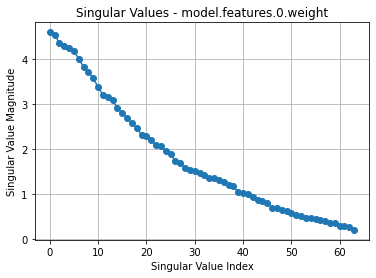

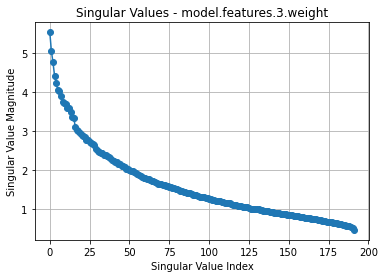

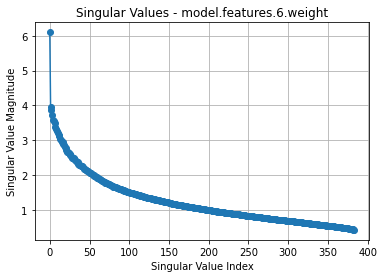

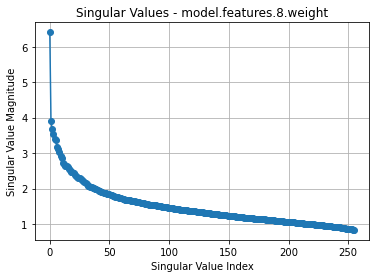

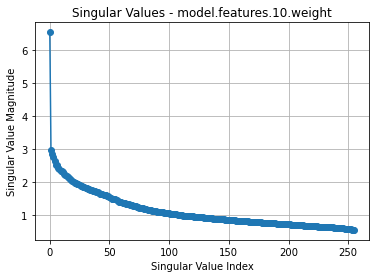

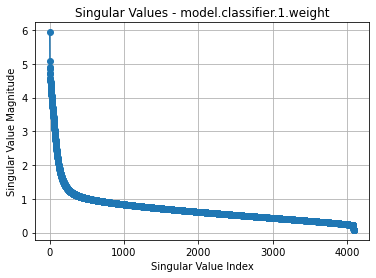

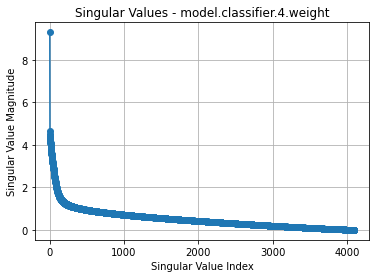

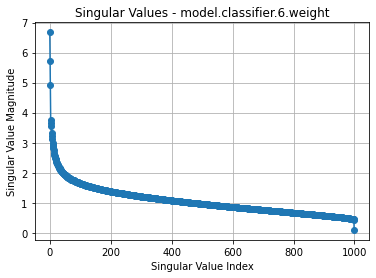

In [30]:
import torch
import torchvision.models as models
import numpy as np
import matplotlib.pyplot as plt

# Define AlexNet model
class AlexNetModel(torch.nn.Module):
    def __init__(self, num_classes=1000):
        super(AlexNetModel, self).__init__()
        self.model = models.alexnet(pretrained=True)
        # Remove the fully connected layers for feature extraction
        self.features = self.model.features
        self.avgpool = self.model.avgpool

    def forward(self, x):
        x = self.features(x)
        x = self.avgpool(x)
        return x

# Function to extract pre-trained weight matrices
def extract_pretrained_weights(model):
    pretrained_weights = {}
    for name, param in model.named_parameters():
        if 'weight' in name:
            pretrained_weights[name] = param.data
    return pretrained_weights

# Function to reshape and perform SVD on weight matrices
def svd_weight_matrices(weight_matrices, rank=0):
    decomposed_weights = {}
    singular_values = {}
    for name, weight_matrix in weight_matrices.items():
        shape = weight_matrix.shape
        reshaped_matrix = weight_matrix.view(shape[0], -1)
        
        # Perform SVD
        U, S, V = torch.svd(reshaped_matrix)
        
        # Truncate to specified rank
        #U = U[:, :rank]
        #S = S[:rank]
        #V = V[:, :rank]
        
        # Reconstruct the decomposed matrix
        reconstructed_matrix = torch.mm(U, torch.diag(S)).mm(V.t())
        decomposed_weights[name] = reconstructed_matrix.view(*shape)
        singular_values[name] = S
    
    return decomposed_weights, singular_values

# Create an instance of the AlexNet model
alexnet_model = AlexNetModel()

# Extract pre-trained weight matrices
pretrained_weights = extract_pretrained_weights(alexnet_model)

# Perform SVD on weight matrices with rank 10
svd_weights, singular_values = svd_weight_matrices(pretrained_weights, rank=0)

# Visualize singular values for each layer
for name, sv in singular_values.items():
    plt.figure()
    plt.plot(sv.numpy(), marker='o')
    plt.title(f'Singular Values - {name}')
    plt.xlabel('Singular Value Index')
    plt.ylabel('Singular Value Magnitude')
    plt.grid(True)
    plt.show()
